##Treinamento de uma rede SOM
#Importando o Dataset

In [1]:
import pandas as pd
import numpy as np
dados = pd.read_csv("https://raw.githubusercontent.com/Natalnet/GCiD/master/Codes/Data/notas_lop_2017_2.csv",index_col=False)
dados.head()

,Unnamed: 0,lab1,lab2,lab3,lab4,lab5,exe1,exe2,exe3,exe4,exe5
0,0,10.0,10.0,2.0,4.0,10.0,3.333333,2.777778,4.000000,1.250,3.12500
1,1,0.0,6.4,10.0,NaN,10.0,0.000000,1.777778,2.666667,0.625,5.62500
2,4382,NaN,2.0,4.0,2.0,2.0,NaN,0.555556,3.106667,3.125,2.08125
3,4381,NaN,2.0,4.0,2.0,2.0,NaN,0.555556,3.106667,0.000,2.08125
4,4436,NaN,NaN,4.0,6.0,10.0,NaN,NaN,2.666667,1.875,3.12500


#Treinando os dados

#Para não ocorrer erros, será necessário separar os espaços vazios e trocar por 0, após isso apaga as linhas q tem 0 e o inplace=true irá salvar no arquivo as mudanças feitas

In [3]:
# Seleciona todos os espaços vazios(NaN) e troca por 0.0
dados.fillna(0.0,inplace=True)
dados.drop(columns="Unnamed: 0",inplace=True)
dados.head()

,lab1,lab2,lab3,lab4,lab5,exe1,exe2,exe3,exe4,exe5
0,10.0,10.0,2.0,4.0,10.0,3.333333,2.777778,4.000000,1.250,3.12500
1,0.0,6.4,10.0,0.0,10.0,0.000000,1.777778,2.666667,0.625,5.62500
2,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,3.125,2.08125
3,0.0,2.0,4.0,2.0,2.0,0.000000,0.555556,3.106667,0.000,2.08125
4,0.0,0.0,4.0,6.0,10.0,0.000000,0.000000,2.666667,1.875,3.12500


In [4]:
X_train = dados.values
[row, col] = X_train.shape
print (row," ",col)
print(X_train[0])

298   10
[10.         10.          2.          4.         10.          3.33333333
  2.77777778  4.          1.25        3.125     ]


In [5]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8603 sha256=6ad24343bb3e4de0d93449dce74b2302a204e7b44eb01995046f4bdc98ccef54
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built minisom


In [7]:
# Training the SOM
tamanhoXdaRede = 6; 
tamanhoYdaRede = 6; 

quantidadeCaracteristicas = col
from minisom import MiniSom
som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = quantidadeCaracteristicas, sigma = 1.0, learning_rate = 0.4)
som.pca_weights_init(X_train)

som.train_random(data = X_train, num_iteration = 500000)

#Visualizando os dados

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()

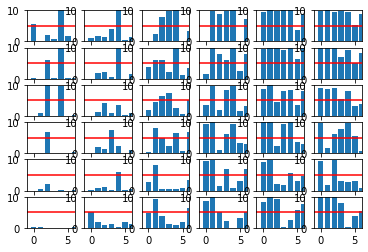

In [9]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(quantidadeCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 6, 0, 10])
    plt.bar(x, elem)
    plt.plot([-1,6],[5,5],'r')
plt.show()

#Função q mostra apenas o neurónio desejado, para uma melhor análise

In [10]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x = dados.columns
  plt.plot([-1,10],[5,5],'r')
  plt.axis([-1, 10, 0, 10])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

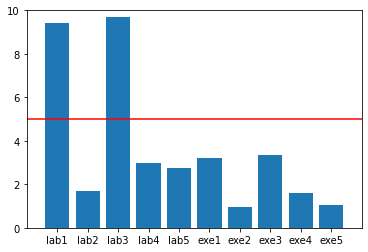

In [13]:
mostraNeuronio(4,5)